In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import japanize_matplotlib
import streamlit as st

In [2]:
st.markdown('''
# 気象庁の観測データの整理

国土交通省・気象庁が1876年より毎月観測しているデータを整理
出所：国土交通省・気象庁（Japan Meteorological Agency）https://www.jma.go.jp/jma/index.html

備考
- 日平均気温データ および 日最高気温データについて、DataFrameをチェックボックスで出力
- 上記データを折れ線グラフで出力
''')
st.text('                            ')
st.text('                            ')
st.text('----------------------------------------------------')

2021-05-16 07:45:39.491 WARNING root: 
  command:

    streamlit run /opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [3]:
# 日平均気温データ(Excel)の読み込み
df_a1= pd.read_excel('data_a1.xlsx')

# 'Year'をindexに設定
df_a = df_a1.set_index('Year')

In [4]:
st.markdown('''
< 日平均気温データ・データフレーム >
''')

# dfのチェックボックス
if st.checkbox('DataFrame of Daily Average Temperature'):
    st.dataframe(df_a)
st.text('                            ')
st.text('                            ')
st.text('----------------------------------------------------')

In [5]:
st.markdown('''
< 日平均気温データ・グラフ >
''')

selected_targets_a = st.multiselect('Month - average', df_a.columns)
view_a = df_a[selected_targets_a]
st.line_chart(view_a)
st.text('                            ')
st.text('                            ')
st.text('----------------------------------------------------')

/opt/anaconda3/lib/python3.8/site-packages/altair/utils/core.py:185: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  warnings.warn(


In [6]:
# 日最高気温データ(Excel)の読み込み
df_h1= pd.read_excel('data_h.xlsx')

# 'Year'をindexに設定
df_h = df_h1.set_index('Year')

In [7]:
st.markdown('''
< 日最高気温データ・データフレーム >
''')
# dfのチェックボックス
if st.checkbox('DataFrame of Daily Maximum Temperature'):
    st.dataframe(df_h)
st.text('                            ')
st.text('                            ')
st.text('----------------------------------------------------')

In [8]:
st.markdown('''
< 日最高気温データ・グラフ >
''')
selected_targets_h = st.multiselect('Month - maximum', df_h.columns)
view_h = df_h[selected_targets_h]
st.line_chart(view_h)
st.text('                            ')
st.text('                            ')
st.text('----------------------------------------------------')

In [9]:
st.text('                            ')
st.markdown('''
## 1月の日平均気温・100年後の予測

- 時系列解析ライブラリ Prophetを使用
- 気象庁のデータを使用

''')

2021-05-16 07:45:40.449 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


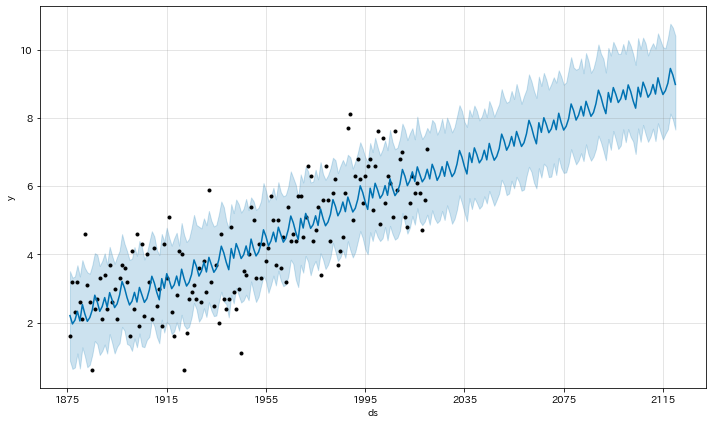

In [10]:
# 学習データ用意
# 日付のデータは、暫定的に各年の1月1日に設定

df= pd.read_excel('data_a1.xlsx')
data = pd.DataFrame()
data['y'] = df['Jan.']
data['ds'] = df[['Year']].apply(lambda x: '{}'.format(x[0]) , axis=1)+ '-01-01'

# モデル構築 with 学習データ
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data)

# 100年後の予測
future_data = model.make_future_dataframe(periods=100, freq='y')
forecast_data = model.predict(future_data)

a = model.plot(forecast_data)
st.pyplot(a)

In [11]:
st.text('----------------------------------------------------')
st.text('                            ')
st.markdown('''
## 結果

- 1875年では、1月・日平均(24時間)気温が2℃程。
- 2020年近辺では、6℃程であり、約4℃ほど上昇。

- 約100年後の2115年には、9℃程になり、日本では1月は冬がなくなる。。。
- 今の内に、1月は雪合戦をしておきましょう。

''')

In [12]:
st.text('----------------------------------------------------')
st.text('                            ')
st.markdown('''
## 課題

- Prophetの可視化で、@st.chacheができず、毎回、予測計算をしてしまい、読み込み時間がかかる。
- 月単位の予測データの可視化が未完成

''')